# Imports

In [1]:
import pandas as pd

# Read csv's

## Inbounds loads

In [2]:
df_inbound = pd.read_csv("inbound_loads.csv", index_col=0)
print(df_inbound.shape)
df_inbound

(56146, 17)


,warehouse_order_number,customer_code,load_reference_number,carrier_code,front_temperature,middle_temperature,back_temperature,net_weight,weight_uom,case_quantity,pallet_count,load_start_datetime,load_finish_datetime,signout_datetime,dock_door_number,trailer_number,truck_signin_datetime
0,1290649.0,2537.0,I42171197,TMDN,-1.0,-1.0,-1.0,39000.0,pounds,1625.0,24.0,2019-02-11 04:42:00,2019-02-11 04:51:00,2019-02-11 04:19:10,59.0,1362664,2019-02-11 02:00:09
1,1293130.0,2537.0,I42169605,CKKI,4.0,4.0,4.0,29561.0,pounds,1232.0,26.0,2019-01-16 10:11:00,2019-01-16 11:27:00,2019-01-16 09:57:04,60.0,MWCU5258117,2019-01-16 07:24:26
2,1298947.0,2537.0,I42178319,CKTH,NaN,NaN,NaN,39984.0,pounds,1666.0,24.0,2019-07-30 09:59:00,2019-07-30 10:18:00,2019-07-30 10:21:11,61.0,CGMU5027645,2019-07-30 07:21:09
3,1299947.0,2537.0,I42169266,NTGO,-10.0,-7.0,-6.0,37800.0,pounds,1260.0,18.0,2019-01-10 08:51:00,2019-01-10 08:58:00,NaN,58.0,54087,2019-01-10 08:04:05
4,1299948.0,2537.0,I42169269,NTGO,3.0,4.0,5.0,41394.0,pounds,1380.0,18.0,2019-01-10 07:26:00,2019-01-10 08:08:00,2019-01-10 07:43:34,56.0,305266,2019-01-10 04:29:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56141,1516046.0,4859.0,NaN,NaN,NaN,NaN,NaN,NaN,pounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56142,1516048.0,4859.0,NaN,NaN,NaN,NaN,NaN,NaN,pounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56143,1516070.0,117480.0,NaN,QKWI,NaN,NaN,NaN,52275.0,pounds,1307.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
56144,1516085.0,6147.0,I361062091,JBSY,NaN,NaN,NaN,36000.0,pounds,1200.0,25.0,2022-01-03 16:12:00,2022-01-03 16:26:00,2022-01-03 12:01:26,56.0,420140,2022-01-03 12:01:25


### Subset of start and finish loading times

Load start and finish datetime are the same for each row with the same load_reference_number.
Therefore, group by load_reference_number first!! 

In [3]:
f = ['load_reference_number', 'load_start_datetime', 'load_finish_datetime', 'dock_door_number']
df_load_times = df_inbound[f].copy()

# Drop NaNs and group by load_reference_number
df_load_times = df_load_times.dropna().drop_duplicates()
df_load_times[['load_start_datetime', 'load_finish_datetime']] = df_load_times[['load_start_datetime', 'load_finish_datetime']].apply(pd.to_datetime)

# calculate the duration of the loading
df_load_times['load_duration'] = (df_load_times['load_finish_datetime'] - df_load_times['load_start_datetime']) / pd.Timedelta(minutes=1)

# round by nearest 10 min to make it easier to compare
df_load_times['load_finish'] = df_load_times['load_finish_datetime'].round('10min')
df_load_times = df_load_times.sort_values(by='load_finish')

# drop inaccurate datetimes where load_duration < 0
df_load_times = df_load_times.loc[df_load_times['load_duration'] >= 0]
df_load_times

,load_reference_number,load_start_datetime,load_finish_datetime,dock_door_number,load_duration,load_finish
238,I42168974,2018-12-30 06:33:00,2018-12-30 09:38:00,1.0,185.0,2018-12-30 09:40:00
244,I42169019,2018-12-31 11:45:00,2018-12-31 11:51:00,44.0,6.0,2018-12-31 11:50:00
60,I42168556,2018-12-31 14:01:00,2018-12-31 14:25:00,47.0,24.0,2018-12-31 14:20:00
249,I42169039,2018-12-31 16:49:00,2018-12-31 17:11:00,49.0,22.0,2018-12-31 17:10:00
77,I42168518,2018-12-31 16:28:00,2018-12-31 17:25:00,55.0,57.0,2018-12-31 17:20:00
...,...,...,...,...,...,...
56119,I361061987,2022-01-03 14:25:00,2022-01-03 15:07:00,91.0,42.0,2022-01-03 15:10:00
56144,I361062091,2022-01-03 16:12:00,2022-01-03 16:26:00,56.0,14.0,2022-01-03 16:30:00
56014,I361061428,2022-01-03 16:35:00,2022-01-03 17:08:00,93.0,33.0,2022-01-03 17:10:00
56099,I361061889,2022-01-03 16:38:00,2022-01-03 17:23:00,40.0,45.0,2022-01-03 17:20:00


Group by load_finish and take the sum of load_duration


In [4]:
df_load_duration = df_load_times.groupby(['load_finish'])['load_duration'].sum().reset_index()
df_load_duration

,load_finish,load_duration
0,2018-12-30 09:40:00,185.0
1,2018-12-31 11:50:00,6.0
2,2018-12-31 14:20:00,24.0
3,2018-12-31 17:10:00,22.0
4,2018-12-31 17:20:00,57.0
...,...,...
33828,2022-01-03 14:20:00,178.0
33829,2022-01-03 15:10:00,42.0
33830,2022-01-03 16:30:00,14.0
33831,2022-01-03 17:10:00,33.0


found in inbound_loads.csv:
* all weight_uom values are in pounds (or NaN)
* 17756 different trailers in use. Some are used >267 times, others only once. 

## pallet history

In [5]:
df_pallet = pd.read_csv('Pallet_history_Gold_Spike.csv', index_col=0)
print(df_pallet.shape)
# df_pallet.head(20)
# val_counts = df['trailer_number'].value_counts() 
# print (val_counts['TNU8521169'])
# [print(x,y) for (x, y) in val_counts[val_counts<2].items()]
# df.loc[df['weight_uom']!='pounds']


(4925535, 14)


In [6]:
df_pallet.head()

,source_system_id,warehouse_facility_id,customer_code,from_location_code,to_location_code,transaction_date,tran_type,quantity,work_type,final_pallet_code,warehouse_pallet_code,lot_code,received_date,move_category
0,11,42,3610,UNASSIGNED,0030130071,2021-11-23 07:43:18,NaN,0,WRONGFULL,NaN,1363587-,1363587,2021-11-21 10:39:33,outbound move
1,11,42,3610,0030130071,0030130071,2021-11-23 07:50:20,NaN,0,WRONGFULL,NaN,1363587-,1363587,2021-11-21 10:39:33,outbound move
2,11,42,3610,0030130071,0030130071,2021-11-23 16:56:53,NaN,0,WRONGFULL,NaN,1363587-,1363587,2021-11-21 10:39:33,outbound move
3,11,42,3610,UNASSIGNED,0030130071,2021-11-23 07:43:18,NaN,0,WRONGFULL,NaN,1364144-,1364144,2021-11-21 10:39:33,outbound move
4,11,42,3610,0030130071,0030130071,2021-11-23 07:50:20,NaN,0,WRONGFULL,NaN,1364144-,1364144,2021-11-21 10:39:33,outbound move


In [7]:
# not_same = df_pallet[df_pallet['warehouse_pallet_code']!=df_pallet['final_pallet_code']]
df_pallet['work_type'].value_counts()

# for c in df_pallet.columns:
#     display(df_pallet[c].value_counts())


work_type
FULLS         1283584
MOVE          1066965
PUTAWAYS      1064119
STAGE          459850
PARTIALS-V     421453
SWAPFULL       140374
DROPS          121828
INBOUNDRUN      61493
WRONGFULL       58373
ANYFULL         51160
CHRYPICK-S      44122
RELOS           43206
PARTIALS-S      40809
FULLCHGLOC      29580
SWAPDROP        19423
UN-LOAD          8353
LOCCHANGE        6608
RELORUN          2239
FULLRELO         1080
REVDROPS          735
DROPRETURN        102
DROPRELO           79
Name: count, dtype: int64

found in Pallet_history_Gold_Spike.csv:
* all source_system_id are 11
* all warehouse_facility_id are 42 (same warehouse for all)
* all final_pallet_code are NaN

Columns to drop:
* source_system_id
* warehouse_facility_id
* tran_type
* final_pallet_code

In [8]:
f = ['from_location_code', 'to_location_code', 'transaction_date', 'quantity', 'work_type', 'warehouse_pallet_code', 'lot_code', 
     'received_date', 'move_category' ]
df_pallet[f].head(20)
# df_pallet['warehouse_pallet_code'].head(10)

,from_location_code,to_location_code,transaction_date,quantity,work_type,warehouse_pallet_code,lot_code,received_date,move_category
0,UNASSIGNED,0030130071,2021-11-23 07:43:18,0,WRONGFULL,1363587-,1363587,2021-11-21 10:39:33,outbound move
1,0030130071,0030130071,2021-11-23 07:50:20,0,WRONGFULL,1363587-,1363587,2021-11-21 10:39:33,outbound move
2,0030130071,0030130071,2021-11-23 16:56:53,0,WRONGFULL,1363587-,1363587,2021-11-21 10:39:33,outbound move
3,UNASSIGNED,0030130071,2021-11-23 07:43:18,0,WRONGFULL,1364144-,1364144,2021-11-21 10:39:33,outbound move
4,0030130071,0030130071,2021-11-23 07:50:20,0,WRONGFULL,1364144-,1364144,2021-11-21 10:39:33,outbound move
5,0030130071,0030130071,2021-11-23 16:56:53,0,WRONGFULL,1364144-,1364144,2021-11-21 10:39:33,outbound move
6,UNASSIGNED,0030130071,2021-11-23 07:43:18,0,WRONGFULL,1364970-,1364970,2021-11-21 10:39:33,outbound move
7,0030130071,0030130071,2021-11-23 07:50:20,0,WRONGFULL,1364970-,1364970,2021-11-21 10:39:33,outbound move
8,0030130071,0030130071,2021-11-23 16:56:53,0,WRONGFULL,1364970-,1364970,2021-11-21 10:39:33,outbound move
9,UNASSIGNED,CFORK15449,2021-11-10 00:54:06,10,MOVE,1366438-,1366438,2021-11-09 16:56:57,location move


## weather


In [9]:
df_weather = pd.read_csv("weather.csv", index_col=0)
df_weather.describe()

,Relative Humidity,Temperature,hour
count,325666.000000,327728.000000,328242.000000
mean,67.175292,66.104457,11.483485
std,20.652946,17.073400,6.925141
min,9.020000,-2.200000,0.000000
25%,51.580000,53.600000,5.000000
50%,68.810000,68.000000,11.000000
75%,83.370000,78.800000,17.000000
max,100.000000,107.600000,23.000000


In [10]:
# Remove timezone and convert to datetime object
df_weather = df_weather.drop(['datetime_UTC','hour'], axis='columns')
df_weather['datetime'] = df_weather['datetime'].apply(lambda x: x[:-6])
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

In [11]:
df_weather

,datetime,Relative Humidity,Temperature
0,2018-12-31 18:00:00,50.37,53.6
1,2018-12-31 18:05:00,50.37,53.6
2,2018-12-31 18:10:00,50.37,53.6
3,2018-12-31 18:15:00,50.37,53.6
4,2018-12-31 18:20:00,50.37,53.6
...,...,...,...
328237,2021-12-31 17:35:00,82.89,68.0
328238,2021-12-31 17:40:00,82.89,68.0
328239,2021-12-31 17:45:00,82.89,68.0
328240,2021-12-31 17:50:00,82.89,68.0


## Demand kwtrain val


In [70]:
df_demand = pd.read_csv("demand_kWtrain_val.csv", index_col=0)
df_demand['datetime_local'] = pd.to_datetime(df_demand['datetime_local']) # Convert to datetime object
df_demand

C:\Users\roell\AppData\Local\Temp\ipykernel_24432\3650327429.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_demand['datetime_local'] = pd.to_datetime(df_demand['datetime_local']) # Convert to datetime object


,datetime_local,demand_kW
0,2018-12-31 21:15:00,2064.101392
1,2018-12-31 21:30:00,1874.002081
2,2018-12-31 21:45:00,1988.168511
3,2018-12-31 22:00:00,2022.795943
4,2018-12-31 22:15:00,1986.981872
...,...,...
365344,2021-12-13 17:55:00,NaN
365345,2021-12-13 17:56:00,NaN
365346,2021-12-13 17:57:00,NaN
365347,2021-12-13 17:58:00,NaN


# Prepare dataset

Order rows in time

In [71]:
df_demand= df_demand.sort_values('datetime_local') # first sort datetime to use merge_asof
df_weather = df_weather.sort_values('datetime')

Get average of previous 10 demand_kW

In [ ]:
# TODO: first row avg_demand is NaN
# TODO: first 10 testset rows avg_demand should not been calculated

In [89]:
def get_avg_demand(df):
    # Compute average demand of the current and previous 9 rows
    df['avg_demand'] = df['demand_kW'].rolling(window=10, min_periods=1).mean()
    # Shift the avg_demand column by 1 row, because we want the average of the previous 10 readings not including the current one.
    df['avg_demand'] = df['avg_demand'].shift(1)
    return df

df_model1 = df_demand.copy()
df_model1 = get_avg_demand(df_model1)
df_model1

,datetime_local,demand_kW,avg_demand
0,2018-12-31 21:15:00,2064.101392,NaN
1,2018-12-31 21:30:00,1874.002081,2064.101392
2,2018-12-31 21:45:00,1988.168511,1969.051737
3,2018-12-31 22:00:00,2022.795943,1975.423995
4,2018-12-31 22:15:00,1986.981872,1987.266982
...,...,...,...
365344,2021-12-13 17:55:00,NaN,NaN
365345,2021-12-13 17:56:00,NaN,NaN
365346,2021-12-13 17:57:00,NaN,NaN
365347,2021-12-13 17:58:00,NaN,NaN


## Merge df_demand and df_weather 
to get the humidity and temperature at the given datetime.


In [90]:
def get_weather(df, df_weather):
    df = pd.merge_asof(df, df_weather, left_on="datetime_local", right_on="datetime", direction='nearest')
    df = df.drop(columns=['datetime'])
    return df

df_model1 = get_weather(df_model1, df_weather)
df_model1

,datetime_local,demand_kW,avg_demand,Relative Humidity,Temperature
0,2018-12-31 21:15:00,2064.101392,NaN,61.27,46.4
1,2018-12-31 21:30:00,1874.002081,2064.101392,61.27,46.4
2,2018-12-31 21:45:00,1988.168511,1969.051737,65.60,44.6
3,2018-12-31 22:00:00,2022.795943,1975.423995,65.60,44.6
4,2018-12-31 22:15:00,1986.981872,1987.266982,65.60,44.6
...,...,...,...,...,...
365344,2021-12-13 17:55:00,NaN,NaN,55.15,60.8
365345,2021-12-13 17:56:00,NaN,NaN,55.15,60.8
365346,2021-12-13 17:57:00,NaN,NaN,55.15,60.8
365347,2021-12-13 17:58:00,NaN,NaN,55.15,60.8


## Add load_duration to df_demand_temp

For each df_demand datetime, get the load duration of the previous X hours

In [66]:
df_demand_temp_load = df_demand_temp.copy()

hours = 2

df_demand_temp_load['duration'] = 0
for idx, row in df_demand_temp_load.iterrows():
    # Define the start date as 24 hours before the current datetime
    end_date = row['datetime_local'].round('10min')
    start_date = end_date - pd.Timedelta(hours=hours)
    
    # Select all rows in df_load_duration where the datetime is within the past X hours
    mask = df_load_duration['load_finish'].between(start_date, end_date)
    
    # Sum all durations in the selected rows and store in df_demand_temp
    df_demand_temp_load.at[idx, 'duration'] = df_load_duration.loc[mask, 'load_duration'].sum()
    
df_demand_temp_load

KeyboardInterrupt: 

In [17]:
# save dataset to csv
df_demand_temp_load.to_csv(f"df_demand_temp_load_{hours}hours.csv")

# Train model

In [18]:
df = pd.read_csv(f'df_demand_temp_load_{hours}hours.csv', index_col=0)
df['datetime_local'] = pd.to_datetime(df['datetime_local'])


## Split train and test data

In [19]:
df_train = df[df['demand_kW'].notna()]
df_test = df[df['demand_kW'].isna()]
df_train.shape, df_test.shape

((273988, 6), (91361, 6))

In [27]:
from sklearn.model_selection import train_test_split

# define features and target variable
features_to_use = ['Relative Humidity', 'Temperature', 'duration', 'avg_demand'] 

# train and val datasets
X, y = df_train[features_to_use], df_train['demand_kW']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2)

# test dataset
X_test = df_test[features_to_use]

## Start training 1

Find out what are the best parameters to use for the model
Run only once!

In [21]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# define hyperparameter grid to search over
param_grid = {
    'n_estimators': [1000, 1500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 10],
    'min_child_weight': [1]
}

# create model instance
model = XGBRegressor(random_state=42, tree_method='gpu_hist')  # Use GPU accelerated algorithm

# define grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

# fit model with grid search
grid_search.fit(X_train, y_train)

# print out the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# check model score on train data
train_score = grid_search.score(X_train, y_train)
print(f"Train score: {train_score}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=1000; total time=  11.3s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=1000; total time=  10.6s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=1000; total time=  10.7s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=1500; total time=  16.1s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=1500; total time=  15.4s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=1500; total time=  15.6s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=1000; total time=  51.2s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=1000; total time=  51.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=1000; total time=  53.3s
[CV] END learning_rate=0.05, ma

Save best parameters as json file to load them later

In [22]:
import json

# get best parameters
best_params = grid_search.best_params_

# write to json file
with open('best_params.json', 'w') as file:
    json.dump(best_params, file)

Train model with best params

In [28]:
# load parameters from json file
with open('best_params.json', 'r') as file:
    best_params = json.load(file)

# create model instance with best parameters
model = XGBRegressor(**best_params, random_state=42, tree_method='gpu_hist')

# fit model with best parameters
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

# Validation

In [57]:
X_val['demand_kW'] = y_pred
X_val

,Relative Humidity,Temperature,duration,avg_demand,demand_kW
217563,74.19,80.6,52.0,2705.777500,2720.325684
246203,30.82,71.6,158.0,2486.765400,2477.158691
74579,82.65,64.4,51.0,1849.293657,1805.971680
49943,47.61,78.8,7.0,2147.423566,2086.495361
252702,36.87,80.6,186.0,2352.715200,2368.645996
...,...,...,...,...,...
240799,78.09,71.6,21.0,2353.289000,2361.056396
99286,88.62,75.2,71.0,2509.590800,2537.522461
53172,55.15,86.0,738.0,2534.226627,2444.270996
114331,41.36,93.2,185.0,2878.534700,2868.560547


In [59]:
df_true = df_train.loc[X_val.index]
df_true

,datetime_local,demand_kW,avg_demand,Relative Humidity,Temperature,duration
217563,2021-09-01 08:01:00,2942.923000,2705.777500,74.19,80.6,52.0
246203,2021-09-21 22:22:00,2428.828000,2486.765400,30.82,71.6,158.0
74579,2021-03-30 10:00:00,2033.810831,1849.293657,82.65,64.4,51.0
49943,2020-06-15 00:30:00,2010.415141,2147.423566,47.61,78.8,7.0
252702,2021-09-26 11:10:00,2386.623000,2352.715200,36.87,80.6,186.0
...,...,...,...,...,...,...
240799,2021-09-18 04:14:00,2464.997000,2353.289000,78.09,71.6,21.0
99286,2021-06-07 03:08:00,2471.111000,2509.590800,88.62,75.2,71.0
53172,2020-07-21 20:15:00,2551.305676,2534.226627,55.15,86.0,738.0
114331,2021-06-17 14:05:00,2894.601000,2878.534700,41.36,93.2,185.0


In [65]:
diff = abs(y_val-X_val['demand_kW'])
diff.mean()

92.712452022034

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
# make predictions
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [32]:
import numpy as np
import math

print(f"Best parameters: {grid_search.best_params_}")
print(f"Train score: {train_score:.3f}")
print("\nValidation scores")
print(f'R^2 Score: {r2:.3f}')
print(f"MSE: {mse:.3f}")
rootmse = math.sqrt(mse)
print(f"RMSE:{rootmse:.3f}")
m = np.mean(y_val)
print(f"Mean value y_test: {m:.3f}")
print(f"RelRootMSE:{rootmse/m:.4f} == {(rootmse/m)*100:.1f}%")

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 1000}
Train score: 0.829

Validation scores
R^2 Score: 0.925
MSE: 15312.695
RMSE:123.744
Mean value y_test: 2404.346
RelRootMSE:0.0515 == 5.1%


Feature importance

['Relative Humidity', 'Temperature', 'duration', 'avg_demand']
             feature  importance
3         avg_demand    0.944703
1        Temperature    0.021578
2           duration    0.017635
0  Relative Humidity    0.016084


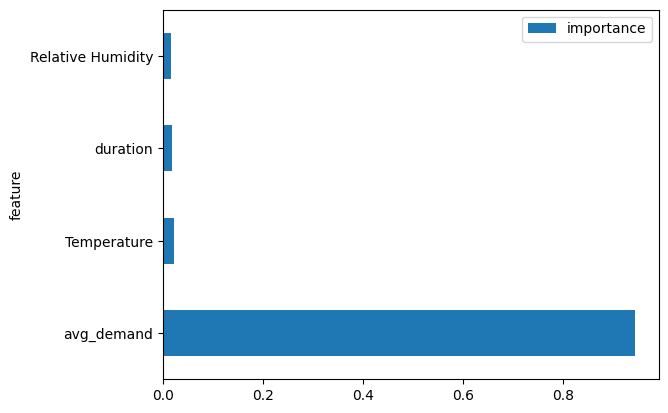

In [41]:
from matplotlib import pyplot as plt

# create a mapping between `f` labels and original feature names
fmap = {f'f{i}': feat for i, feat in enumerate(features_to_use)}
print(features_to_use)
# get importance

# importance = grid_search.best_estimator_.get_booster().get_score(importance_type='weight')
importances = model.feature_importances_

# Create a DataFrame to map importances to their feature names
importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Display the DataFrame
print(importances_df)

# # create a DataFrame of feature importances
# importance_df = pd.DataFrame({'feature': list(importance.keys()), 'importance': list(importance.values())})

# # replace `f` labels with original feature names
# importance_df['feature'] = importance_df['feature'].map(fmap)

# plot importances
importances_df.plot(kind='barh', x='feature', y='importance')
plt.show()

Plot a few samples to compare y_val and y_pred

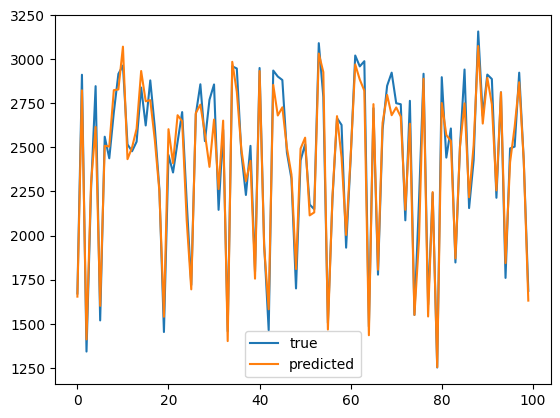

In [47]:
import matplotlib.pyplot as plt
import random

n = 100
x_ax = range(n)


# sample n indexes
samples_indexes = random.sample(range(len(y_val)), n)

# use these indexes to subset y_val and y_pred
samples_val = y_val.iloc[samples_indexes]
samples_pred = y_pred[samples_indexes]

# samples_val = y_val.sample(n)
# samples_pred = y_pred[samples_val.index]
plt.plot(x_ax, samples_val, label='true')
plt.plot(x_ax, samples_pred, label= 'predicted')
plt.legend()
plt.show()

Below:
In this plot, the black dashed line represents the line of perfect predictions (i.e., where the true value equals the predicted value). The points represent your data: the x-coordinate of each point is the true value for that data point, and the y-coordinate is the predicted value. If your model was perfect, all points would lie on this line. The more closely the points cluster around the line, the better your model is.

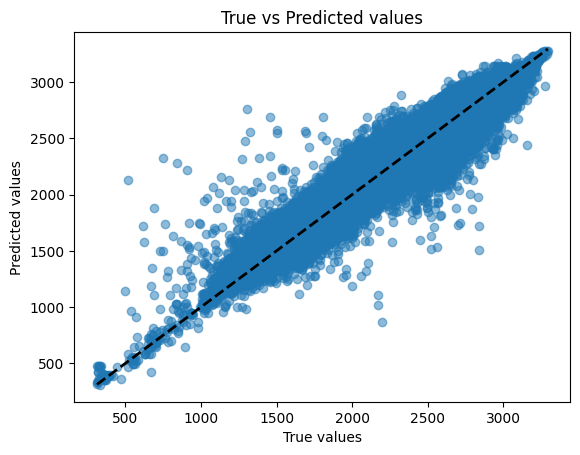

In [45]:
import matplotlib.pyplot as plt

plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted values')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.show()


Below: In this plot, each bar represents a range of residuals, and the height of the bar is the number of data points with residuals in that range. If your model is good, the histogram will look like a normal distribution centered at 0, showing that your model's errors are randomly distributed around 0. If the histogram is not centered around 0, or if it's skewed to one side, that suggests there may be some systematic error in your model.

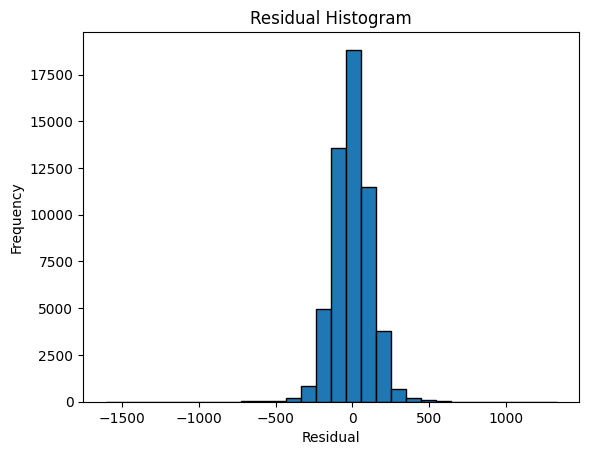

In [46]:
import matplotlib.pyplot as plt
import numpy as np

residuals = y_val - y_pred
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()


# Run test 

In [99]:
predictions = model.predict(X_test).tolist()

In [100]:
df_results = pd.DataFrame()
df_results['datetime_local'] = df_test['datetime_local'].copy()  # Copy the 'datetime' column
df_results['Prediction'] = predictions

In [101]:
df_results.to_csv(f"results_{'_'.join(features_to_use)}.csv")

In [102]:
print(df_results)

             datetime_local   Prediction
273988  2021-10-11 06:08:00  1958.796387
273989  2021-10-11 06:09:00  1958.796387
273990  2021-10-11 06:10:00  1958.796387
273991  2021-10-11 06:11:00  1958.796387
273992  2021-10-11 06:12:00  1958.796387
...                     ...          ...
365344  2021-12-13 17:55:00  1967.615112
365345  2021-12-13 17:56:00  1967.615112
365346  2021-12-13 17:57:00  1967.615112
365347  2021-12-13 17:58:00  1967.615112
365348  2021-12-13 17:59:00  1967.615112

[91361 rows x 2 columns]


# Results statistics

In [121]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Train score: {train_score:.3f}")
print("\nValidation scores")
print(f'R^2 Score: {r2:.3f}')
print(f"MSE: {mse:.3f}")
rootmse = math.sqrt(mse)
print(f"RMSE:{rootmse:.3f}")
m = np.mean(y_val)
print(f"Mean value y_test: {m:.3f}")
print(f"RelRootMSE:{rootmse/m:.4f} == {(rootmse/m)*100:.1f}%")

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 1000}
Train score: 0.829

Validation scores
R^2 Score: 0.770
MSE: 46563.149
RMSE:215.785
Mean value y_test: 2406.218
RelRootMSE:0.0897 == 9.0%
